Importar las librerias necesarias

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import pywt 

darle a una variable el valor de las lecturas de la base de datos, especificando que carácter es de separación y que carácter es el decimal


In [2]:
df=pd.read_csv("./air+quality/AirQualityUCI.csv",sep=';',decimal=',')
df


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


así, cuando ingresamos la variable a la función head, se nos muestran los primeros 5 valores de la tabla con sus respectivos titulos.


In [3]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


la función tail nos arroja los ultimos valores de la tabla.

In [4]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


para obtener el tamaño de la tabla, se hace uso del párametro shape

In [5]:
df.shape

(9471, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


con la funcion isnull se encuentra la cantidad de datos nulos por columna de datos, así se puede calcular el porcentaje de datos nulos, se recomienda que no supere el 50%

In [7]:
df.isnull().sum()/df.shape[0]*100

Date               1.203674
Time               1.203674
CO(GT)             1.203674
PT08.S1(CO)        1.203674
NMHC(GT)           1.203674
C6H6(GT)           1.203674
PT08.S2(NMHC)      1.203674
NOx(GT)            1.203674
PT08.S3(NOx)       1.203674
NO2(GT)            1.203674
PT08.S4(NO2)       1.203674
PT08.S5(O3)        1.203674
T                  1.203674
RH                 1.203674
AH                 1.203674
Unnamed: 15      100.000000
Unnamed: 16      100.000000
dtype: float64

In [8]:
df.duplicated().sum()

np.int64(113)

In [9]:
for i in df.select_dtypes(include="object").columns:
  print(df[i].value_counts())
  print("//"*20)

Date
03/04/2005    24
02/04/2005    24
11/03/2004    24
12/03/2004    24
13/03/2004    24
              ..
20/03/2004    24
21/03/2004    24
22/03/2004    24
04/04/2005    15
10/03/2004     6
Name: count, Length: 391, dtype: int64
////////////////////////////////////////
Time
18.00.00    390
19.00.00    390
20.00.00    390
21.00.00    390
22.00.00    390
23.00.00    390
00.00.00    390
01.00.00    390
02.00.00    390
03.00.00    390
04.00.00    390
05.00.00    390
06.00.00    390
07.00.00    390
08.00.00    390
09.00.00    390
10.00.00    390
11.00.00    390
12.00.00    390
13.00.00    390
14.00.00    390
15.00.00    389
16.00.00    389
17.00.00    389
Name: count, dtype: int64
////////////////////////////////////////


Para eliminar los duplicados de la base de datos es necesaria la función drop_duplicates, cuando volvemos a asignar el valor de la variable al resultado de esta función entonces tendremos una base de datos sin duplicados en el ambiente

In [10]:
df=df.drop_duplicates()
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,NaN,NaN
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,NaN,NaN
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,NaN,NaN
9356,04/04/2005,14.00.00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028,NaN,NaN


Como se puede observar, se redujo la cantidad de filas de la tabla, lo que significa que la función elimino adecuadamente los duplicados

Para eliminar cualquier contenido de la tabla se usa la función drop, en este caso, eliminaremos las ultimas dos columnas que aparentan estar vacias.

In [11]:
df=df.drop(columns=["Unnamed: 15","Unnamed: 16"])
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04/04/2005,14.00.00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


.iloc localiza datos según su indice, indicando un -1 en las líneas eliminaremos la ultima linea de la tabla que anteriormente contenía valores nulos, esto lo hace seleccionando "todo excepto la ultima linea de la tabla"

In [12]:
df=df.iloc[:-1]
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


Según las caracteristicas de la base de datos definidas en el repositorio, los valores -200 son valores perdidos, asi que los reemplazaremos por 0


In [13]:
df = df.replace(-200,0)
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,0.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,0.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,0.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,0.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


Ahora, hay que indicar cuales son los valores numericos a normalizar

In [14]:
numeric_values=["CO(GT)",	"PT08.S1(CO)", 	"NMHC(GT)", 	"C6H6(GT)", 	"PT08.S2(NMHC)", 	"NOx(GT)", 	"PT08.S3(NOx)", 	"NO2(GT)", 	"PT08.S4(NO2)", 	"PT08.S5(O3)","T","RH","AH"]
features=df[numeric_values]
features

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.0,0.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2.4,1163.0,0.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2.4,1142.0,0.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2.1,1003.0,0.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


Se inicializa el escalador y se asignan las nuevas variables, ademas con la función describe se pueden obtener los calculos estadisticos como promedio (mean), desviación estandar (std), minimos y maximos, asi como los 3 cuartiles incluyendo la mediana (50%)


In [15]:
scaler=MinMaxScaler()
scaled_features=scaler.fit_transform(features)
scaled_df=pd.DataFrame(scaled_features,columns=numeric_values,index=df.index)
scaled_df


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.218487,0.666667,0.126156,0.186813,0.472448,0.112238,0.393589,0.332353,0.609730,0.502576,0.333333,0.551297,0.339668
1,0.168067,0.633333,0.094197,0.147567,0.431346,0.069642,0.437570,0.270588,0.561802,0.385256,0.326882,0.537768,0.325190
2,0.184874,0.687255,0.074012,0.141287,0.424119,0.088573,0.424898,0.335294,0.560360,0.425684,0.296774,0.608794,0.336262
3,0.184874,0.674510,0.067283,0.144427,0.428184,0.116295,0.407007,0.358824,0.570811,0.476813,0.277419,0.676437,0.352622
4,0.134454,0.623529,0.042893,0.102041,0.377597,0.088573,0.449124,0.341176,0.536937,0.439952,0.281720,0.671928,0.353563
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,0.260504,0.644118,0.000000,0.211931,0.497290,0.319135,0.200895,0.558824,0.495135,0.685295,0.511828,0.330327,0.339220
9353,0.201681,0.570098,0.000000,0.178964,0.463866,0.238675,0.225121,0.526471,0.455495,0.502973,0.563441,0.267193,0.319095
9354,0.201681,0.559804,0.000000,0.194662,0.480126,0.198107,0.224748,0.514706,0.447207,0.432818,0.619355,0.206313,0.287136
9355,0.176471,0.491667,0.000000,0.149137,0.434056,0.158891,0.261647,0.458824,0.375135,0.305192,0.649462,0.152198,0.230345


In [16]:
scaled_df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,0.148365,0.518046,0.017976,0.152099,0.407596,0.137694,0.299222,0.274252,0.504253,0.389574,0.419383,0.533353,0.441693
std,0.130610,0.147670,0.076622,0.118678,0.143946,0.145364,0.111575,0.180823,0.159084,0.173632,0.201242,0.219556,0.198550
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050420,0.451471,0.000000,0.062794,0.321138,0.033807,0.237421,0.155882,0.427027,0.277447,0.275269,0.384442,0.310309
50%,0.126050,0.516176,0.000000,0.124019,0.404246,0.095335,0.295937,0.282353,0.521081,0.373365,0.410753,0.547914,0.437831
75%,0.218487,0.598529,0.000000,0.213501,0.499097,0.192022,0.357808,0.391176,0.598919,0.497424,0.559140,0.697858,0.580995
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Así, con los datos normalizados podemos incluirlos nuevamente a la tabla original


In [17]:
df=df.drop(columns=numeric_values).join(scaled_df)
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,0.218487,0.666667,0.126156,0.186813,0.472448,0.112238,0.393589,0.332353,0.609730,0.502576,0.333333,0.551297,0.339668
1,10/03/2004,19.00.00,0.168067,0.633333,0.094197,0.147567,0.431346,0.069642,0.437570,0.270588,0.561802,0.385256,0.326882,0.537768,0.325190
2,10/03/2004,20.00.00,0.184874,0.687255,0.074012,0.141287,0.424119,0.088573,0.424898,0.335294,0.560360,0.425684,0.296774,0.608794,0.336262
3,10/03/2004,21.00.00,0.184874,0.674510,0.067283,0.144427,0.428184,0.116295,0.407007,0.358824,0.570811,0.476813,0.277419,0.676437,0.352622
4,10/03/2004,22.00.00,0.134454,0.623529,0.042893,0.102041,0.377597,0.088573,0.449124,0.341176,0.536937,0.439952,0.281720,0.671928,0.353563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,0.260504,0.644118,0.000000,0.211931,0.497290,0.319135,0.200895,0.558824,0.495135,0.685295,0.511828,0.330327,0.339220
9353,04/04/2005,11.00.00,0.201681,0.570098,0.000000,0.178964,0.463866,0.238675,0.225121,0.526471,0.455495,0.502973,0.563441,0.267193,0.319095
9354,04/04/2005,12.00.00,0.201681,0.559804,0.000000,0.194662,0.480126,0.198107,0.224748,0.514706,0.447207,0.432818,0.619355,0.206313,0.287136
9355,04/04/2005,13.00.00,0.176471,0.491667,0.000000,0.149137,0.434056,0.158891,0.261647,0.458824,0.375135,0.305192,0.649462,0.152198,0.230345


Debemos unir la fecha y hora en una sola columna para obtener un gráfico adecuado, asi que debemos adecuarlo de la siguiente manera:


In [18]:
date_time=df['Date']+ ' ' +df['Time']
df.insert(0,'DateTime',date_time)
df=df.drop(columns=['Date','Time'])
df['DateTime']=pd.to_datetime(df['DateTime'],format='%d/%m/%Y %H.%M.%S')
df


,DateTime,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,0.218487,0.666667,0.126156,0.186813,0.472448,0.112238,0.393589,0.332353,0.609730,0.502576,0.333333,0.551297,0.339668
1,2004-03-10 19:00:00,0.168067,0.633333,0.094197,0.147567,0.431346,0.069642,0.437570,0.270588,0.561802,0.385256,0.326882,0.537768,0.325190
2,2004-03-10 20:00:00,0.184874,0.687255,0.074012,0.141287,0.424119,0.088573,0.424898,0.335294,0.560360,0.425684,0.296774,0.608794,0.336262
3,2004-03-10 21:00:00,0.184874,0.674510,0.067283,0.144427,0.428184,0.116295,0.407007,0.358824,0.570811,0.476813,0.277419,0.676437,0.352622
4,2004-03-10 22:00:00,0.134454,0.623529,0.042893,0.102041,0.377597,0.088573,0.449124,0.341176,0.536937,0.439952,0.281720,0.671928,0.353563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04 10:00:00,0.260504,0.644118,0.000000,0.211931,0.497290,0.319135,0.200895,0.558824,0.495135,0.685295,0.511828,0.330327,0.339220
9353,2005-04-04 11:00:00,0.201681,0.570098,0.000000,0.178964,0.463866,0.238675,0.225121,0.526471,0.455495,0.502973,0.563441,0.267193,0.319095
9354,2005-04-04 12:00:00,0.201681,0.559804,0.000000,0.194662,0.480126,0.198107,0.224748,0.514706,0.447207,0.432818,0.619355,0.206313,0.287136
9355,2005-04-04 13:00:00,0.176471,0.491667,0.000000,0.149137,0.434056,0.158891,0.261647,0.458824,0.375135,0.305192,0.649462,0.152198,0.230345


Para gráficar nuestros valores podemos usar plot, el cual importamos como plt, hay que crear cada plot con la funcion plot

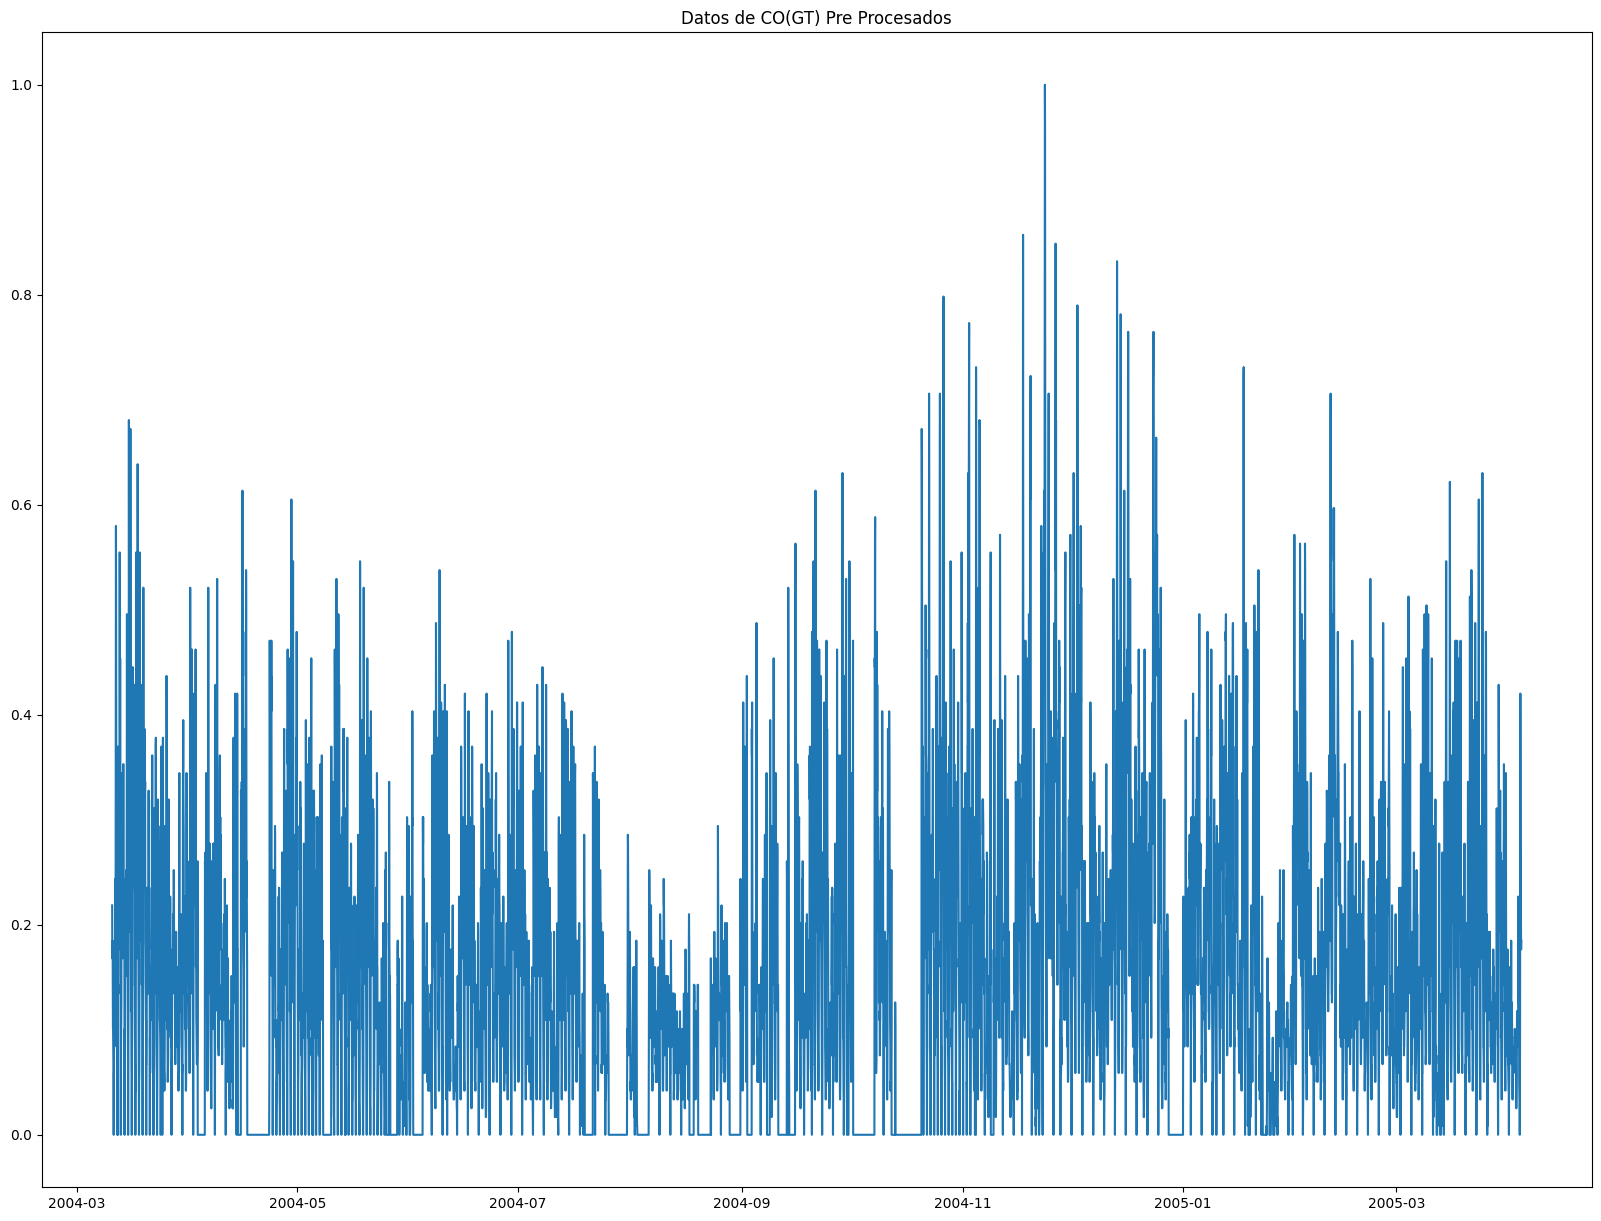

In [28]:
plt.figure(figsize=(20,15))
plt.title("Datos de CO(GT) Pre Procesados")
plt.plot(df['DateTime'],df['CO(GT)'])



Para comparar la gráfica de la base de datos no pre procesada con la ya pre procesada, se asignará a una variable la base de datos original sin pre procesar

In [20]:
df_old=pd.read_csv("./air+quality/AirQualityUCI.csv",sep=';',decimal=',')
df_old


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


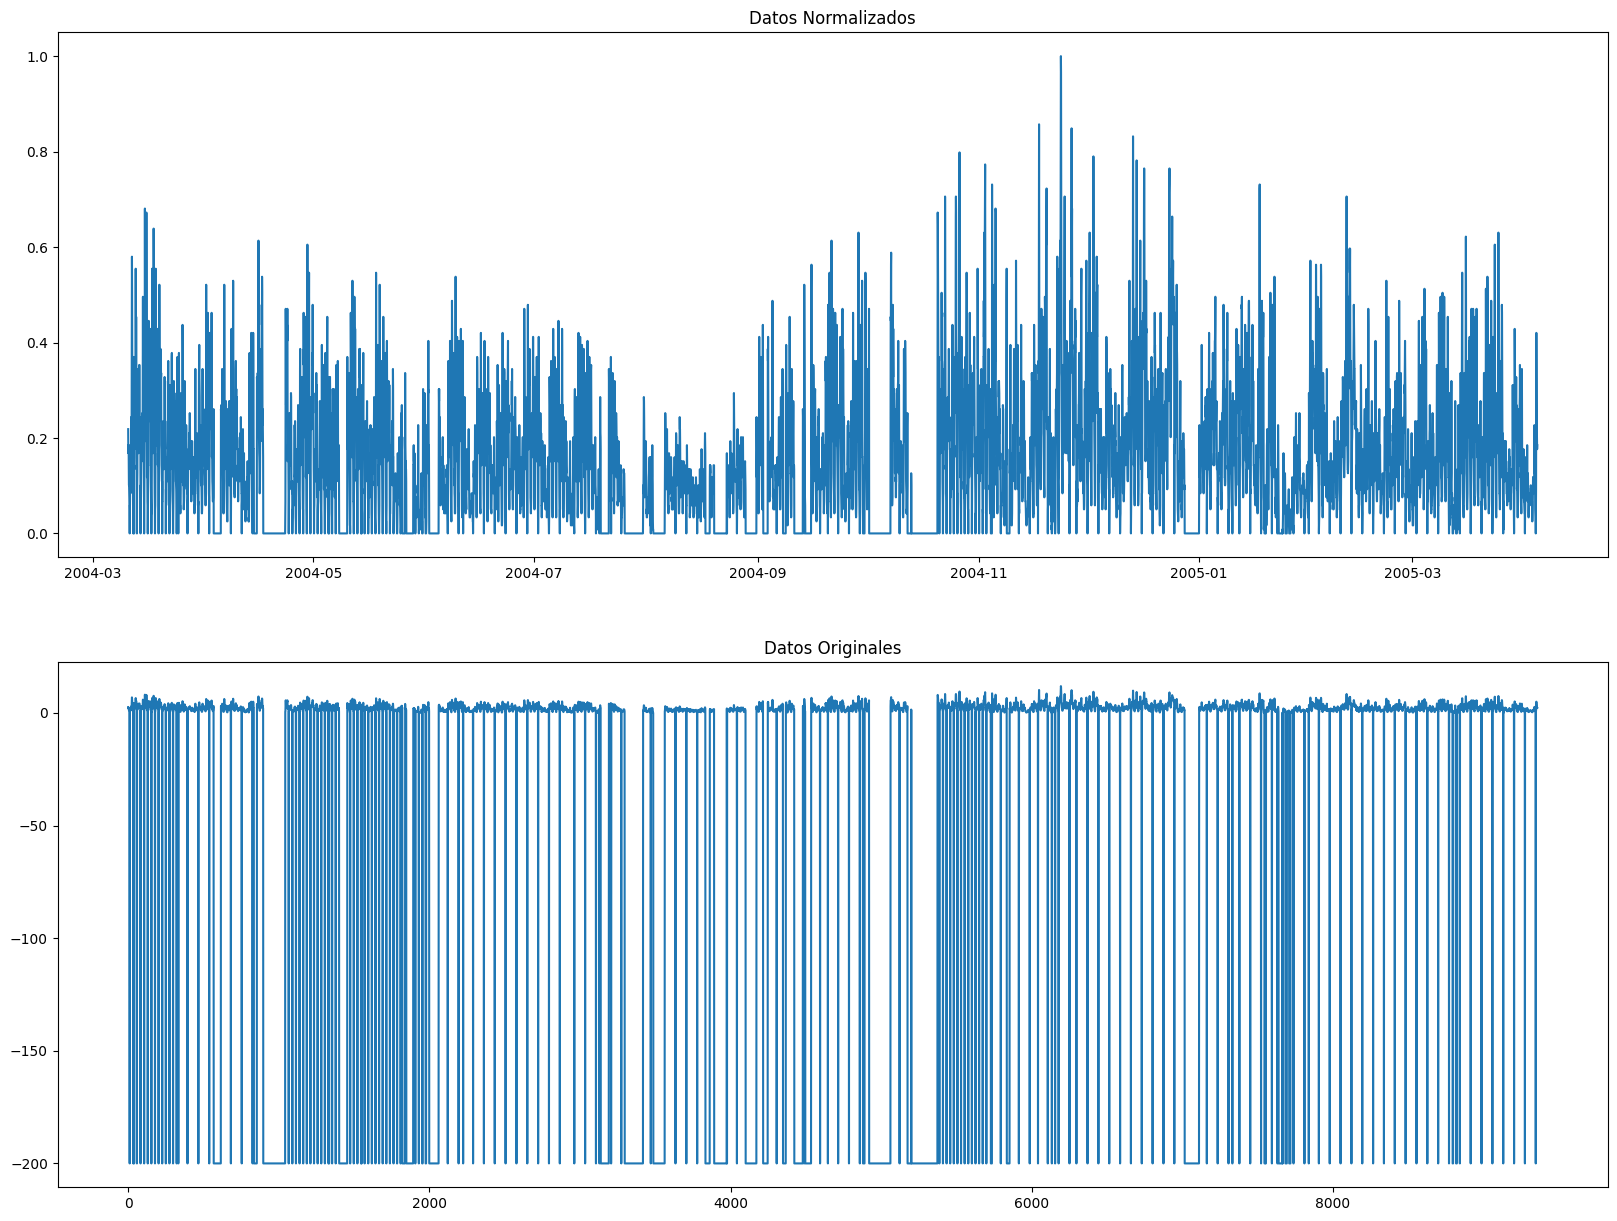

In [21]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
plt.title("Datos Normalizados")
plt.plot(df['DateTime'],df['CO(GT)'])
plt.subplot(2,1,2)
plt.title("Datos Originales")
plt.plot(df_old['CO(GT)'])
plt.savefig('comp_norm.png',dpi=200)

Ahora aplicaremos una transformada wavelet a los valores en CO(GT), asi que debemos asignar a una variable los valores de dicha columna, y luego asignar a dos variables los valores de los coeficientes aproximados y detallados


In [22]:
co_col=df['CO(GT)']
cA, cD = pywt.dwt(co_col, 'haar')
cA

array([0.27333539, 0.26145125, 0.16637807, ..., 0.32681406, 0.26739332,
       0.26145125], shape=(4679,))

In [23]:
cD

array([0.03565244, 0.        , 0.0237683 , ..., 0.04159452, 0.01782622,
       0.        ], shape=(4679,))

Ahora graficaremos ambos coeficientes junto con los valores originales para observar su comportamiento


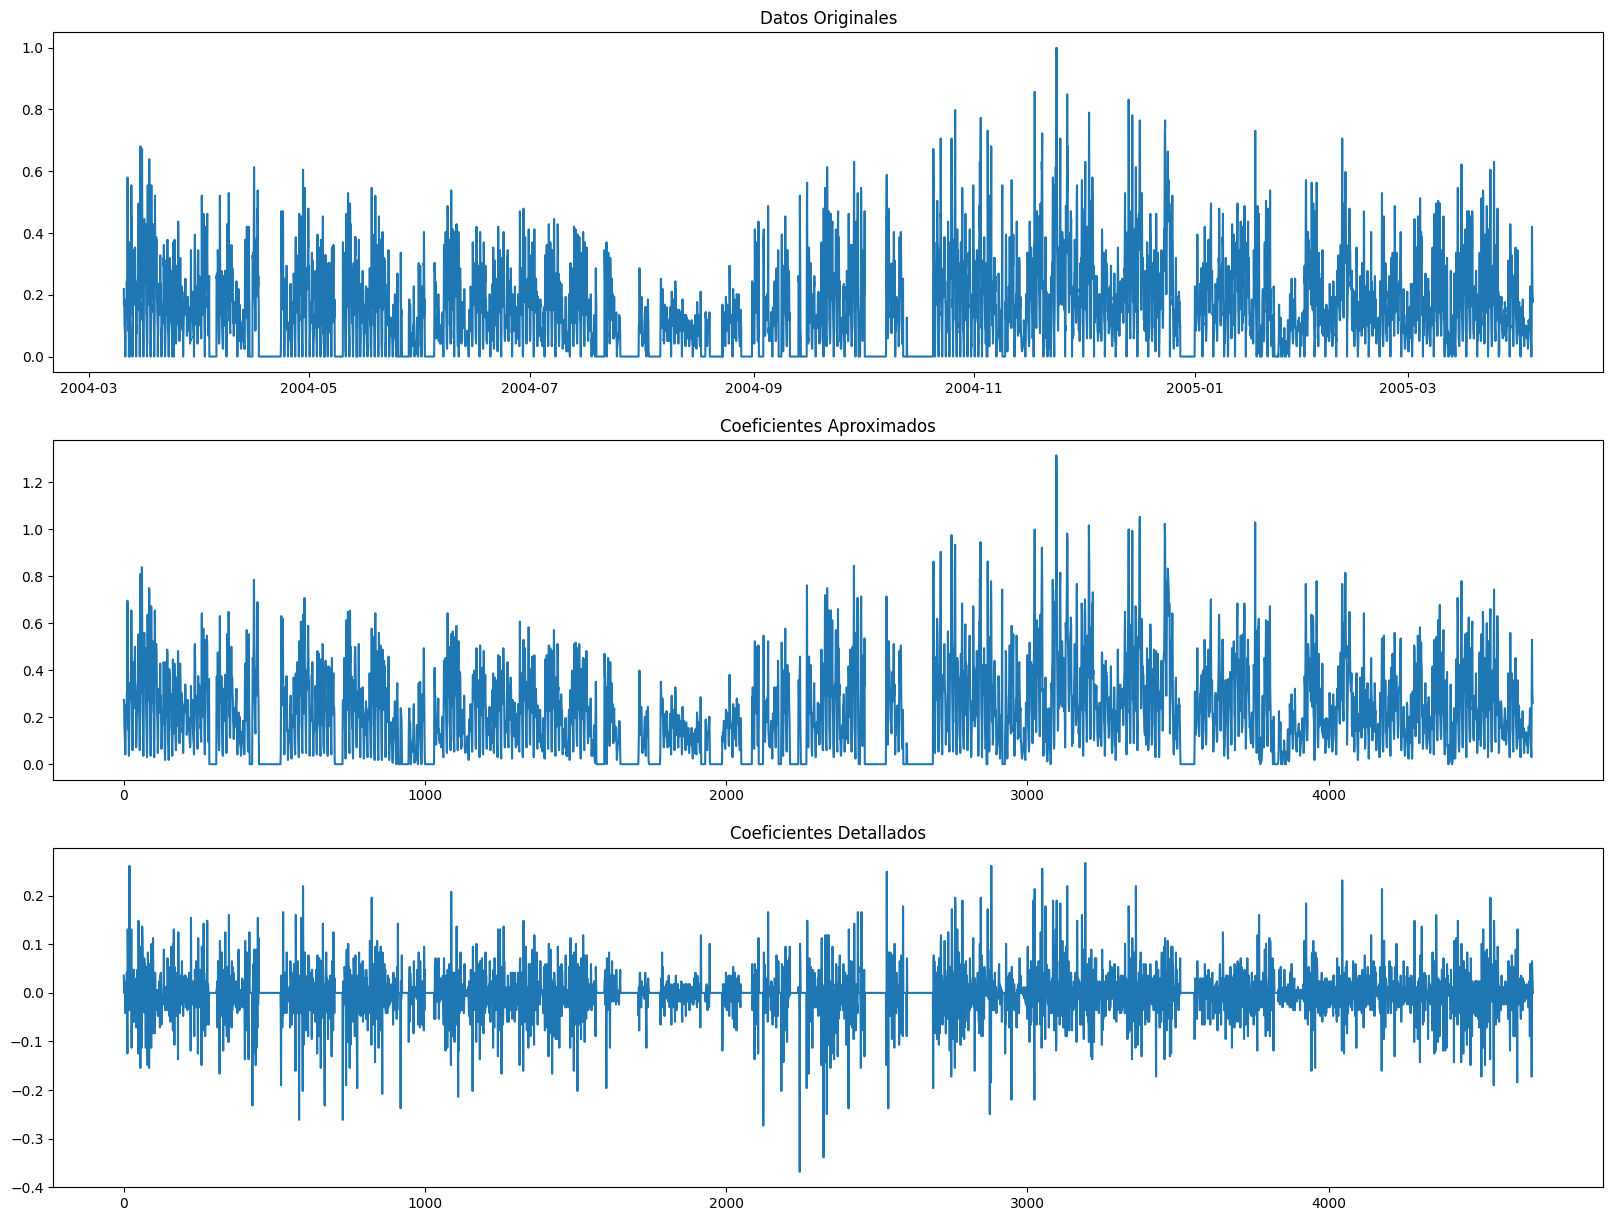

In [24]:
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
plt.title("Datos Originales")
plt.plot(df['DateTime'],df['CO(GT)'])

plt.subplot(3,1,2)
plt.title("Coeficientes Aproximados")
plt.plot(cA)

plt.subplot(3,1,3)
plt.title("Coeficientes Detallados")
plt.plot(cD)

plt.savefig('wavelet.png',dpi=200)

Ahora generaremos la tranformada de fourier de los mismos datos

In [25]:
fxt=np.fft.fft(df['CO(GT)'])
fxt

array([1388.25210084+6.97220059e-14j,   77.06725603+1.76687700e+02j,
        -70.80525519-9.99992524e+01j, ...,   90.21983769-4.29256324e+01j,
        -70.80525519+9.99992524e+01j,   77.06725603-1.76687700e+02j],
      shape=(9357,))

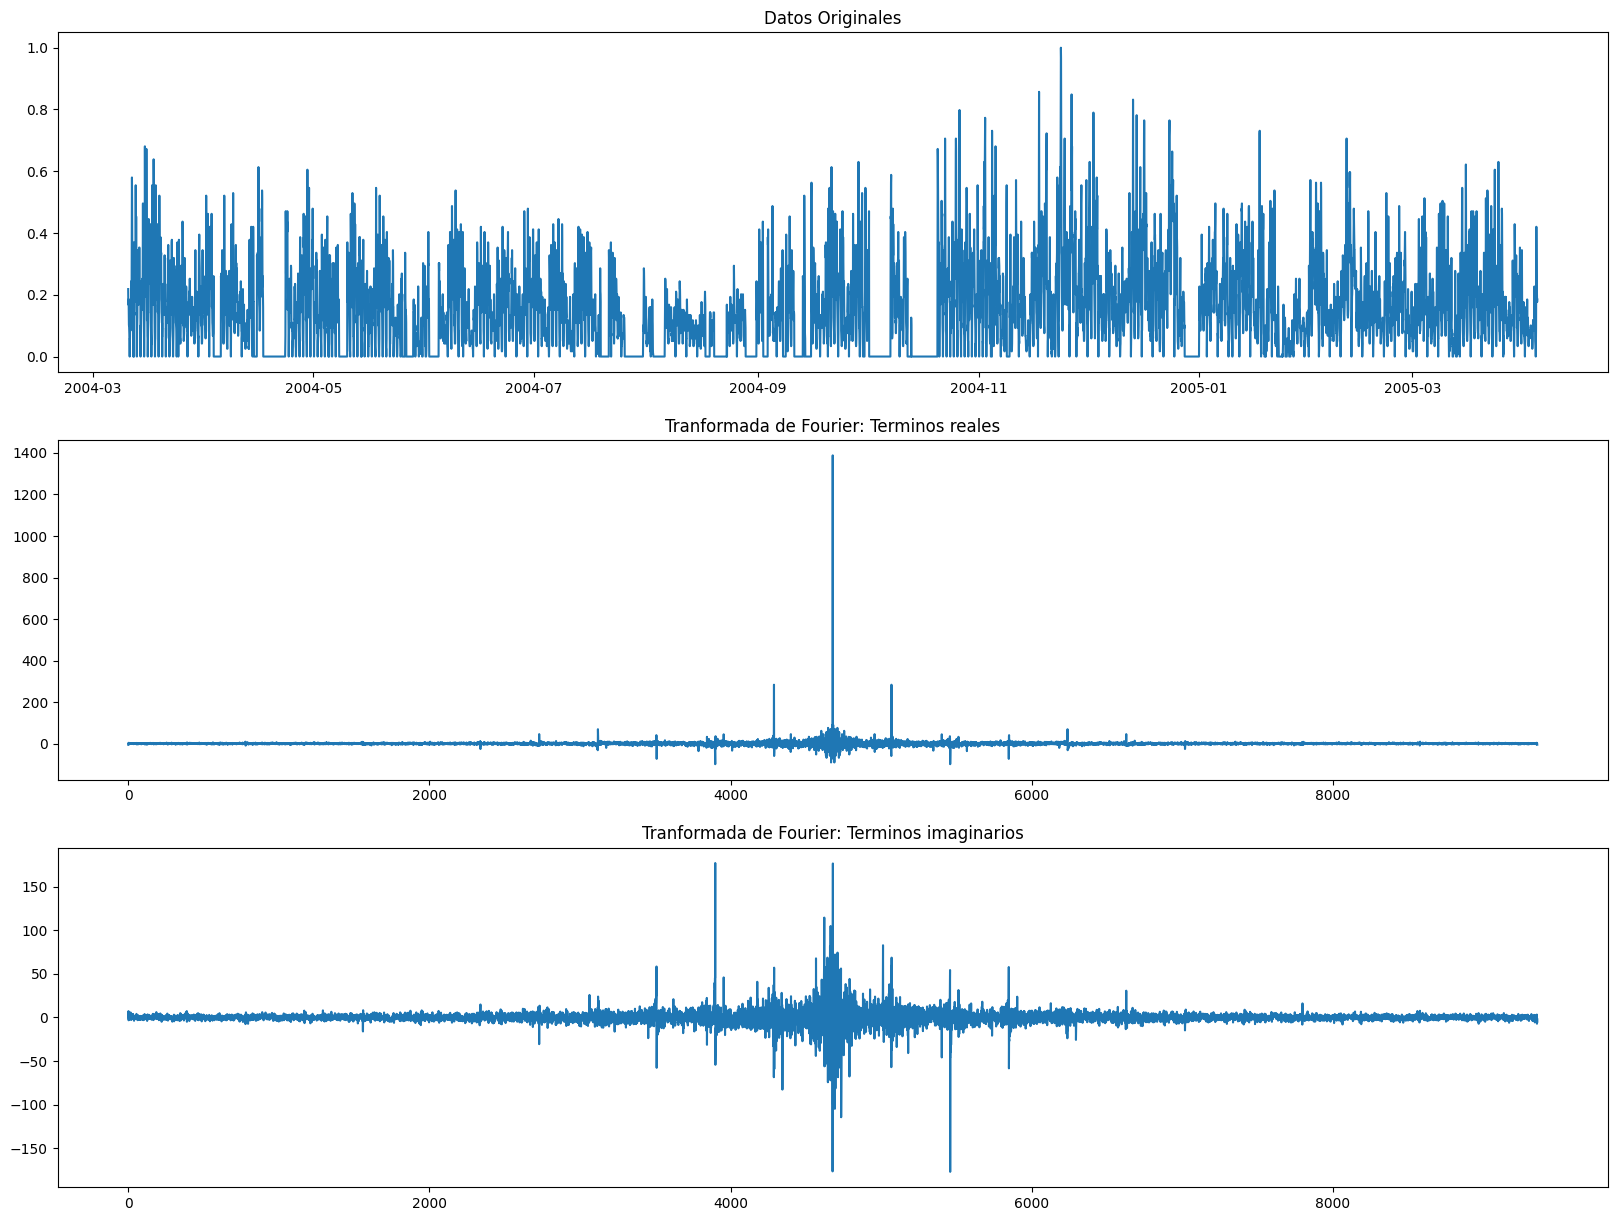

In [26]:
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
plt.title("Datos Originales")
plt.plot(df['DateTime'],df['CO(GT)'])

plt.subplot(3,1,2)
plt.title("Tranformada de Fourier: Terminos reales")
plt.plot(np.fft.fftshift(np.real(fxt)))

plt.subplot(3,1,3)
plt.title("Tranformada de Fourier: Terminos imaginarios")
plt.plot(np.fft.fftshift(np.imag(fxt)))

plt.savefig('fourier.png',dpi=200)